## **Covid_19_Prediction Project**


# **1. INTRODUCTION**

The proposal is important in today's world because accurate prediction of COVID-19 diagnosis can greatly improve medical treatment. It can help identify high-risk individuals early on, allowing for timely interventions and reducing the spread of the virus. Predictive models can also aid in effective screening, enabling healthcare systems to allocate their resources efficiently. By understanding the relationships between symptoms and diagnosis, healthcare professionals can make more informed decisions and provide targeted care.

The proposed method can also have broader implications beyond COVID-19. By analyzing the data and identifying patterns, it may be possible to apply similar approaches to other diseases or outbreaks in the future, thereby enhancing our ability to respond quickly and effectively.

The proposed method can also have broader implications beyond COVID-19. By analyzing the data and identifying patterns, it may be possible to apply similar approaches to other diseases or outbreaks in the future, thereby enhancing our ability to respond quickly and effectively.

# **2. Initial Hypothesis**

Based on the dataset provided, which includes variables such as Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, and Known_contact, we can form the following initial hypotheses:

1. Symptoms such as cough, fever, sore throat, shortness of breath, and
headache will have a significant impact on COVID-19 diagnosis.
2. Age and gender may influence the likelihood of a positive COVID-19 diagnosis.
3. Individuals with known contact with a confirmed COVID-19 case are more likely to test positive for the virus.

# **3. Data Analysis**

**3.1 Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
import warnings
warnings.filterwarnings("ignore") # ignoring wranings

**3.2 Reading Dataset**

In [2]:
df = pd.read_csv('/content/corona_tested_006.csv')

The Dataset has been downloaded from Internet.

In [3]:
df.shape

(278848, 11)

It contains 278848 rows and 11 columns.

**3.3 Checking First and Last 5 rows.**

In [4]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [5]:
df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


**3.4 Checking columns.**

In [6]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

It contains around 11 columns.

**3.4 Checking number of features and their Datatypes.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


Most of the columns are of Object Data type.

**3.5 Checking the unique values in each columns.**

In [8]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

Test_date
['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
--------------------------------------------------
Cough_symptoms
['TRUE' 'FALSE' 'None' False True]
--------------------------------------------------
Fever
['FALSE' 'TRUE' 'None' False True]
--------------------------------------------------
Sore_throat
['TRUE' 'FALSE' 'None' False True]
------------------------

From the above code, It executes the unique values of each columns.

Cough_symptoms, Fever, Sore_throat, Shortness_of_breath and Headache there are 5 unique value as follows 'TRUE', 'FALSE', 'None', False, True among which 2 out of them are Boolean and the rest 3 are strings.

**4. Data Cleaning**

Note: The above stated Boolean Data type needs to be converted to Strings and 'None' should be treated as  Null Value.

In [9]:
df = df.replace('None', np.nan)
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

The above code helps us to convert None string into Null Values.

In [10]:
for i in df.describe(include = 'object'):
    df[i][df[i] =='FALSE'] = False
    df[i][df[i] =='TRUE'] = True


As we have 5 values in 5 columns i.e. TRUE', 'FALSE', 'None', False, True. By the above code, we have converted *String* DataType into *Boolean* DataType.

In [11]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

Test_date
['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
--------------------------------------------------
Cough_symptoms
[True False nan]
--------------------------------------------------
Fever
[False True nan]
--------------------------------------------------
Sore_throat
[True False nan]
--------------------------------------------------
Shortness_of_breath
[False 

Now we have 3 unique values in each symptom column.

In [12]:
df.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

1. There are so many Null Values in both Age_60_above and Sex column.
2. We cannot drop these Null Values because it may effect our dataset.

In [13]:
df['Sex'] = df['Sex'].fillna(value = 'Unknown')
df['Age_60_above'] = df['Age_60_above'].fillna(value = 'Unknown')

We will treat these null values as Unknown.

In [14]:
df.isna().sum()

Ind_ID                   0
Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
Age_60_above             0
Sex                      0
Known_contact            0
dtype: int64

Now we can drop these null values.


In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [17]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


# **5. Feature Engeering**

**5.1 Checking Value Counts in each column.**

In [18]:
df['Cough_symptoms'].value_counts()

False    236368
True      42226
Name: Cough_symptoms, dtype: int64

In [19]:
df['Fever'].value_counts()

False    256843
True      21751
Name: Fever, dtype: int64

In [20]:
df['Sore_throat'].value_counts()

False    276672
True       1922
Name: Sore_throat, dtype: int64

In [21]:
df['Shortness_of_breath'].value_counts()

False    277020
True       1574
Name: Shortness_of_breath, dtype: int64

In [22]:
df['Headache'].value_counts()

False    276186
True       2408
Name: Headache, dtype: int64

In [23]:
df['Corona'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona, dtype: int64

In [24]:
df['Known_contact'].value_counts()

Other                     242504
Abroad                     25462
Contact with confirmed     10628
Name: Known_contact, dtype: int64

In [25]:
df['Age_60_above'].value_counts()

Unknown    127315
No         125504
Yes         25775
Name: Age_60_above, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278594 non-null  int64 
 1   Test_date            278594 non-null  object
 2   Cough_symptoms       278594 non-null  object
 3   Fever                278594 non-null  object
 4   Sore_throat          278594 non-null  object
 5   Shortness_of_breath  278594 non-null  object
 6   Headache             278594 non-null  object
 7   Corona               278594 non-null  object
 8   Age_60_above         278594 non-null  object
 9   Sex                  278594 non-null  object
 10  Known_contact        278594 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.5+ MB


1. In Cough_symptoms,Fever,Sore_throat,Shortness_of_breath and Headache we left with only two values i.e. True and False which is in Boolean.
2. On the other hand Corona, Age_60_above left with 3 values.
3. Next step will be categorical Encoding.

In [27]:
df['Cough_symptoms'] = df['Cough_symptoms'].astype(int)
df['Fever'] = df['Fever'].astype(int)
df['Sore_throat'] = df['Sore_throat'].astype(int)
df['Shortness_of_breath'] = df['Shortness_of_breath'].astype(int)
df['Headache'] = df['Headache'].astype(int)

In [28]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,negative,Unknown,Unknown,Abroad
1,2,11-03-2020,0,1,0,0,0,positive,Unknown,Unknown,Abroad
2,3,11-03-2020,0,1,0,0,0,positive,Unknown,Unknown,Abroad
3,4,11-03-2020,1,0,0,0,0,negative,Unknown,Unknown,Abroad
4,5,11-03-2020,1,0,0,0,0,negative,Unknown,Unknown,Contact with confirmed


In [29]:
df['Corona'] = df.Corona.map({'negative':0, 'positive':1, 'other':2})
df['Known_contact']=df.Known_contact.map({'Abroad':0, 'Contact with confirmed':1, 'Other':2})
df['Sex'] = df.Sex.map({'Unknown':0, 'male':1, 'female':2})
df['Age_60_above'] = df.Age_60_above.map({'Unknown':0, 'Yes':1, 'No':2})

In [30]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,0,0,0,0,0,1,0,1,2
278844,278845,30-04-2020,0,0,0,0,0,0,0,2,2
278845,278846,30-04-2020,0,0,0,0,0,0,0,1,2
278846,278847,30-04-2020,0,0,0,0,0,0,0,1,2


# **6. Exploratory Data Analysis**

**Cough_symptoms (TRUE = 1 , FALSE = 0)**

**FEVER (TRUE = 1 , FALSE = 0)**

**Sore_throat (TRUE = 1 , FALSE = 0)**

**Shortness_of_breath (TRUE = 1 , FALSE = 0)**

**Headache (TRUE = 1 , FALSE = 0)**

**Corona (Negative = 0, Positive =1, Other = 2)**

**Age_60_above (Unknown = 0 , Yes = 1, No = 2)**

**Sex (Unknown = 0, Male = 1,Female  = 2)**

**Known_contact (Abroad=0, Contact with confirmed = 1, Other = 2)**

In [31]:
fig = px.histogram(df, x= 'Sex', color = 'Sex',width = 800,height = 500,)
fig.update_layout(bargap=0.2)
fig.show()

From above graph we can see there are almost equal number of males and females.

In [32]:
fig = px.histogram(df, x= 'Corona', color = 'Corona',width = 800,height = 500, labels = [{'0': 'Negative', '1' : "Positive", '2': 'Other'} ] )
fig.update_layout(bargap=0.2)
fig.show()

1.Bar chart showing the distribution of COVID-19 test results (positive/negative).

2.Negative values are more as compare to other two.

In [33]:
fig = px.pie(df,values= df['Corona'].value_counts(normalize = True), names= ["Negative", 'Positive', 'Other'])
fig.show()


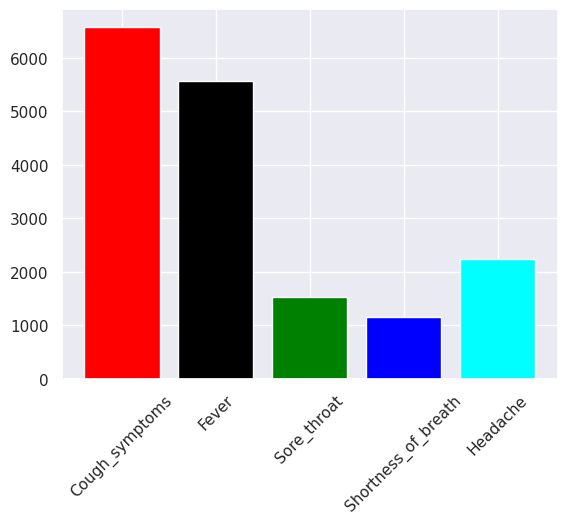

In [34]:
x = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache']
y = ['Corona']

pc = [df[df['Corona']==1][symptom].sum() for symptom in x]

plt.bar(x,pc, color = ['red', 'black', 'green', 'blue', 'cyan'])
plt.xticks(rotation = 45)
plt.show()

he resulting bar chart will display the number of individuals with each symptom in the cases where individuals tested positive for COVID-19. This visualization helps identify which symptoms are more prevalent in individuals who tested positive for COVID-19.

In [35]:
fig = px.pie(df, values=df['Known_contact'][df['Corona']==1].value_counts(), names =['Contact with confirm', 'other', 'Abraod'],  color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [36]:
fig = px.pie(df, values=df['Sex'][df['Corona']==1].value_counts(), names =['male', 'female', 'Unknown'],  hole = .3)

fig.show()

<Axes: xlabel='Age_60_above', ylabel='count'>

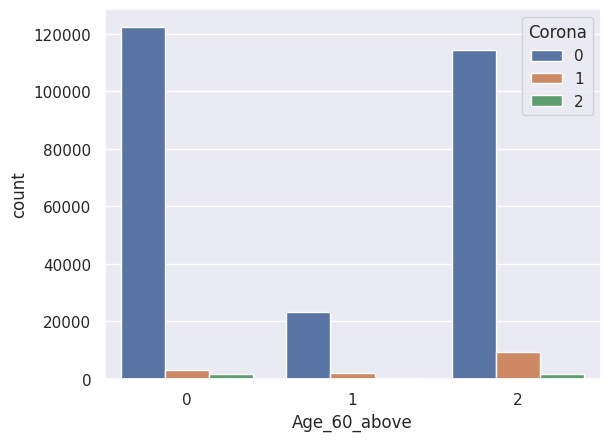

In [37]:
sns.countplot(x = 'Age_60_above', hue = 'Corona' ,data = df)

<Axes: xlabel='Age_60_above', ylabel='count'>

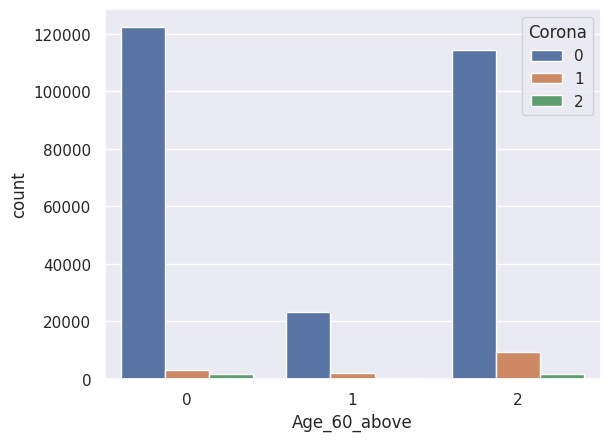

In [38]:
sns.countplot(x = 'Age_60_above', hue = 'Corona' ,data = df)

<Axes: >

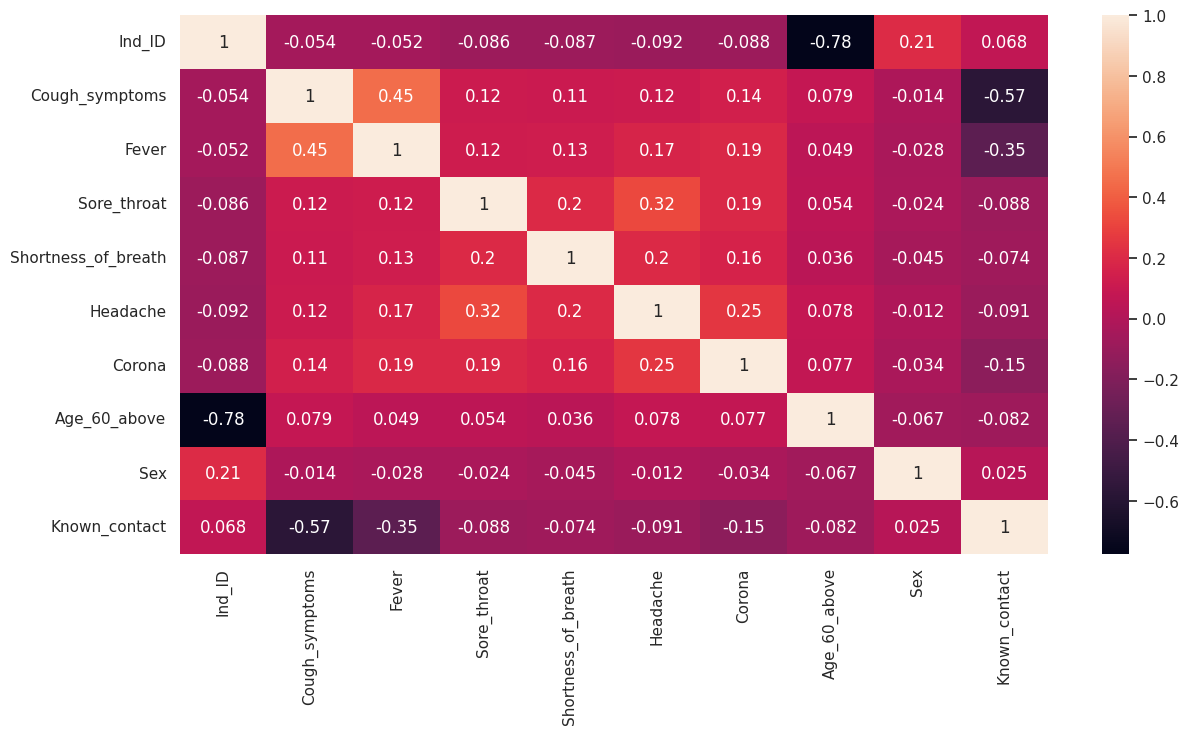

In [39]:
fig = plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot = True)

# **7. Data Preprocessing**

In [40]:
df['Test_date'] = pd.to_datetime(df['Test_date'], format = "%d-%m-%Y")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278594 non-null  int64         
 1   Test_date            278594 non-null  datetime64[ns]
 2   Cough_symptoms       278594 non-null  int64         
 3   Fever                278594 non-null  int64         
 4   Sore_throat          278594 non-null  int64         
 5   Shortness_of_breath  278594 non-null  int64         
 6   Headache             278594 non-null  int64         
 7   Corona               278594 non-null  int64         
 8   Age_60_above         278594 non-null  int64         
 9   Sex                  278594 non-null  int64         
 10  Known_contact        278594 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 25.5 MB



**Note:**

1.   As per our business requirement we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation Set.
2.   And , data from 16th April to 30th april as Test Set.



In [42]:
brk_date = pd.Timestamp("2020-04-15")
df_train = df[df['Test_date']<= brk_date]
df_test = df[df['Test_date'] > brk_date]

In [43]:
df_train

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,1,0,1,0,0,0,0,0,0
1,2,2020-03-11,0,1,0,0,0,1,0,0,0
2,3,2020-03-11,0,1,0,0,0,1,0,0,0
3,4,2020-03-11,1,0,0,0,0,0,0,0,0
4,5,2020-03-11,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
163184,163185,2020-04-15,0,0,0,0,0,0,0,1,2
163185,163186,2020-04-15,0,0,0,0,0,0,0,1,2
163186,163187,2020-04-15,0,0,0,0,0,0,0,2,2
163187,163188,2020-04-15,0,0,0,0,0,0,0,1,2


Dataset from 11th march 2020 to 15th april 2020

In [44]:
df_test

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,163190,2020-04-16,1,0,0,0,0,0,0,2,0
163190,163191,2020-04-16,0,0,0,0,0,0,0,2,2
163191,163192,2020-04-16,1,0,0,0,0,0,0,2,0
163192,163193,2020-04-16,0,0,0,0,0,0,0,1,2
163193,163194,2020-04-16,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,1,0,1,2
278844,278845,2020-04-30,0,0,0,0,0,0,0,2,2
278845,278846,2020-04-30,0,0,0,0,0,0,0,1,2
278846,278847,2020-04-30,0,0,0,0,0,0,0,1,2


Dataset from 16th april to 30th april

# **7. Train/Test Split based on date**

In [45]:
train_x = df_train.drop(columns = ['Ind_ID','Test_date','Corona'])
train_y = df_train['Corona']

x_test = df_test.drop(columns = ['Ind_ID','Test_date','Corona'])
y_test = df_test['Corona']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_x,train_y,test_size = 0.2, random_state = 0)

In [48]:
#Training Set
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

#Test Set
print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (130348, 8)
y_train shape: (130348,)
X_test shape: (115659, 8)
y_test shape: (115659,)


# **8. Build the Algorithm**

***8.1 Logistic Regression***

In [49]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

***8.2 Decision Tree***

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

***8.3 Random Forest***

In [51]:
from sklearn.ensemble import RandomForestClassifier
rtree = RandomForestClassifier(n_estimators = 10, criterion = 'entropy' )
rtree.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

***8.4 KNeighborsClassifier (KNN)***

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

# **9. Prediciton Accuracy**

In [53]:
lg_pred = lg.predict(x_test)
####
dtree_pred = dtree.predict(x_test)
###
rtree_pred = rtree.predict(x_test)
##
knn_pred = knn.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Train accuracy of Logistic Regression is", lg.score(x_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lg.score(x_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test,lg_pred))



Train accuracy of Logistic Regression is 0.9292969589099948
Accuracy (Test) score of Logistic Regression is 0.9642137663303332
Accuracy (Test) score of Logistic Regression is 0.9642137663303332


In [55]:
print("Train accuracy of Decision Tree is", dtree.score(x_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dtree.score(x_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test,dtree_pred))


Train accuracy of Decision Tree is 0.944479393623224
Accuracy (Test) score of Decision Tree is 0.9730414407871415
Accuracy (Test) score of Decision Tree is 0.9730414407871415


In [56]:
print("Train accuracy of Random Forest isAccuracy (Test) score of Random Forest is", rtree.score(x_train, y_train))
print("Accuracy (Test) score of Random Forest is", rtree.score(x_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test,rtree_pred))

Train accuracy of Random Forest isAccuracy (Test) score of Random Forest is 0.9444640500813207
Accuracy (Test) score of Random Forest is 0.97311060963695
Accuracy (Test) score of Random Forest is 0.97311060963695


In [57]:
print("Train accuracy of KNN is", knn.score(x_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(x_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test,knn_pred))

Train accuracy of KNN is 0.9416638536839844
Accuracy (Test) score of KNN is 0.9723929828201869
Accuracy (Test) score of KNN is 0.9723929828201869


### **Conclusion**

With Decision Tree, RandomForest, and KNN models, achieving a high 97% accuracy rate, they all offer strong options for deployment. Logistic Regression, while still accurate at 96%, falls slightly behind. You can confidently choose any of the top three models for deployment, depending on practical considerations and business needs. These models have demonstrated their capability to perform exceptionally well, but the final decision may hinge on factors like model interpretability, computational efficiency, and specific Business requirements.





## **10. Making Predictions.**

In [58]:
input_values = [[1,1,1,0,1,1,2,2]]

pred = knn.predict(input_values)
print(pred)

if pred==0:
    print(" Corona Negative")
else:
    print("Corona Positiive")

[1]
Corona Positiive


In [59]:
df.to_csv("Cleaned_data.csv")